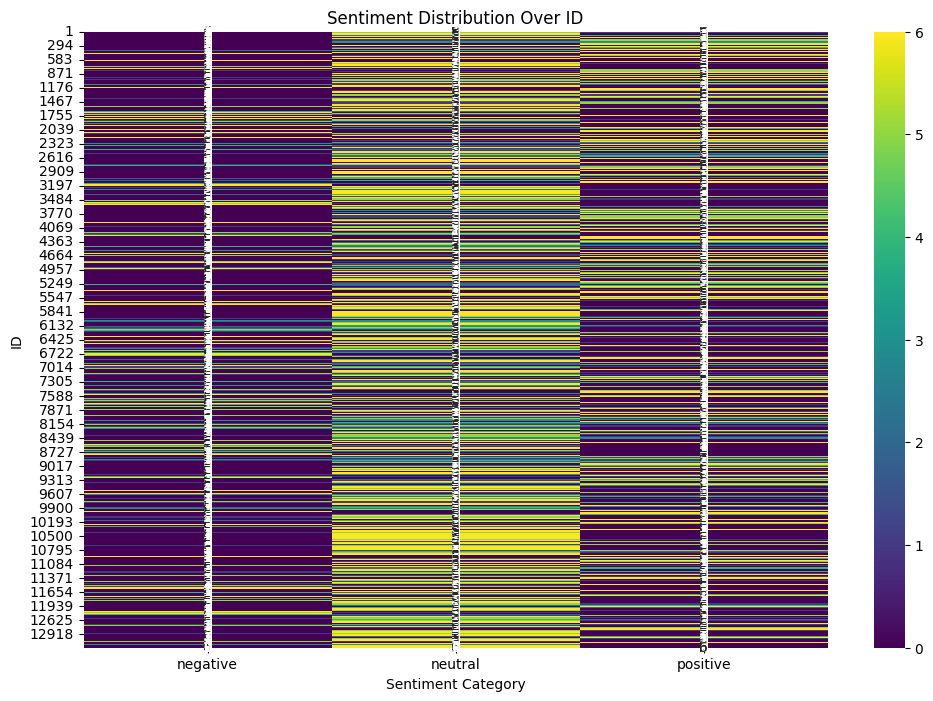

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load your training dataset
train_df = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Category', 'Sentiment', 'Text'])

# Assuming 'ID' is the unique identifier, 'Text' is the column containing text data
id_column = 'ID'
text_column = 'Text'

# Check for missing values in the training dataset
train_df[text_column] = train_df[text_column].astype(str)
train_df = train_df.dropna(subset=[text_column])

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    try:
        analysis = TextBlob(text)
        # Return sentiment polarity as a numeric value
        return analysis.sentiment.polarity
    except NotImplementedError:
        return None  # Handle the NotImplementedError if any
    # Apply sentiment analysis to each text in the training dataset
train_df['sentiment_polarity'] = train_df[text_column].apply(analyze_sentiment)

# Apply sentiment analysis to each text in the validation dataset
train_df['sentiment_category'] = pd.cut(train_df['sentiment_polarity'],
                                        bins=[-1, -0.2, 0.2, 1],
                                        labels=['negative', 'neutral', 'positive'])

# Create a pivot table for the heatmap
heatmap_data = train_df.pivot_table(index=train_df[id_column], columns='sentiment_category', aggfunc='size', fill_value=0)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Sentiment Distribution Over ID')
plt.xlabel('Sentiment Category')
plt.ylabel('ID')
plt.show()